In [56]:
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import GridspecLayout, Button, Layout
import ipywidgets as widgets
import datetime as dt
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [57]:
city_dropdown = widgets.Dropdown(
    options=[('Kyoto','japan/Kyoto'), ('Toronto', 'canada/Toronto'), ('Washington','usa/Washington')],
    value='japan/Kyoto',
    description='City:',
    disabled=False,
)

In [58]:
display(city_dropdown)

Dropdown(description='City:', options=(('Kyoto', 'japan/Kyoto'), ('Toronto', 'canada/Toronto'), ('Washington',…

Showing 10 most recent predictions for Kyoto
Upcoming peak bloom in Kyoto expected on 11 October, 2019


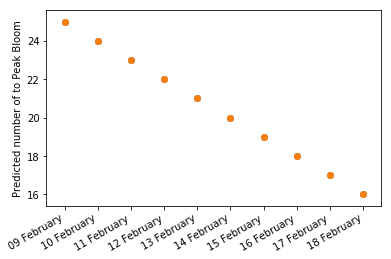

In [66]:
country_city = city_dropdown.value
#Next level - update data every day (once, at midnight, for the set of cities I use)

#Next level - go scrape data each time you choose a location (doesn't need to be from list)
#get weather of 50 previous days from Washington

    #scrape weather data from desired location
    #process data
    #get predictions of past 10 days

#For now: show predictions for each city that are stored in memory
city = country_city.split(r'/',1)[1]

#TODO: lookup predictions for selected city
x = np.arange(50)
y = np.flip(np.arange(50))+np.ones(50)*16

number_of_predictions = 10

print('Showing ' + str(number_of_predictions) + ' most recent predictions for ' + city)

#show plot of recent predictions
plt.scatter(x[len(x)-number_of_predictions:],y[len(x)-number_of_predictions:])
#plt.xlabel('Days')
plt.ylabel('Predicted number of to Peak Bloom')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %B'))#(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

#plt.plot(x,y)
#plt.figure(figsize=(20,10))

plt.scatter(x[len(x)-number_of_predictions:],y[len(x)-number_of_predictions:])
plt.gcf().autofmt_xdate()

predicted_date = dt.date.today() + timedelta(days = int(y[-1]))
print('Upcoming peak bloom in ' + city + ' expected on ' + predicted_date.strftime("%d %B, %Y"))